In [ ]:
import pandas as pd
import glob
import numpy as np
import re

In [ ]:
df_files=pd.read_csv("/content/drive/MyDrive/Enhanced_ML_Framework/final/OTU_CRC_4168_final.tsv",sep="\t")
df_files

,name,ERR1018185,ERR1018186,ERR1018187,ERR1018188,ERR1018189,ERR1018190,ERR1018191,ERR1018192,ERR1018193,...,SRR8865592,SRR8865593,SRR8865594,SRR8865595,SRR8865596,SRR8865597,SRR8865598,SRR8865599,SRR8865600,SRR8865601
0,MGYG000003389,0,0,0,10,22,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fibrobacter_A_intestinalis,52,0,10,13,41,0,0,0,35,...,0,0,0,0,0,0,0,0,0,0
2,UBA4248_sp004554395,64,42,15,0,76,0,0,12,33,...,0,0,0,0,0,0,10,0,0,0
3,MGYG000003670,0,0,0,24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bruticola_sp004554425,77,684,13,240,184,0,0,318,43,...,0,0,0,25,0,0,45,0,61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4597,CAG-83_sp900547745,95637,2756,2717,2299,12152,1573,244,166,762,...,233,1847,331,15,0,2320,1067,32,2636,58
4598,CAG-83_sp000431575,133941,310679,13939,555676,86503,304452,2920,37209,61607,...,1175,2537,45,38,21,1219,645,439,773,654
4599,CAG-83_sp003539495,157833,2709,122592,10902,5796,1173,710,282,30551,...,18562,1743,130,0,0,1572,4464,20,14572,236
4600,CAG-83_sp000435555,166900,3796,9058,11143,11613,2727,1275,407,1276,...,1744,73094,498,21,0,73394,3854,71,9491,291


In [ ]:
df_out=pd.read_csv("/content/drive/MyDrive/Enhanced_ML_Framework/final/OTU_CRC_4168_final.tsv",sep="\t")
df_out.index=df_out["name"].values
df_out=df_out.drop(columns="name")

df_out

,ERR1018185,ERR1018186,ERR1018187,ERR1018188,ERR1018189,ERR1018190,ERR1018191,ERR1018192,ERR1018193,ERR1018194,...,SRR8865592,SRR8865593,SRR8865594,SRR8865595,SRR8865596,SRR8865597,SRR8865598,SRR8865599,SRR8865600,SRR8865601
MGYG000003389,0,0,0,10,22,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fibrobacter_A_intestinalis,52,0,10,13,41,0,0,0,35,0,...,0,0,0,0,0,0,0,0,0,0
UBA4248_sp004554395,64,42,15,0,76,0,0,12,33,0,...,0,0,0,0,0,0,10,0,0,0
MGYG000003670,0,0,0,24,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bruticola_sp004554425,77,684,13,240,184,0,0,318,43,41,...,0,0,0,25,0,0,45,0,61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAG-83_sp900547745,95637,2756,2717,2299,12152,1573,244,166,762,181,...,233,1847,331,15,0,2320,1067,32,2636,58
CAG-83_sp000431575,133941,310679,13939,555676,86503,304452,2920,37209,61607,17855,...,1175,2537,45,38,21,1219,645,439,773,654
CAG-83_sp003539495,157833,2709,122592,10902,5796,1173,710,282,30551,152,...,18562,1743,130,0,0,1572,4464,20,14572,236
CAG-83_sp000435555,166900,3796,9058,11143,11613,2727,1275,407,1276,477,...,1744,73094,498,21,0,73394,3854,71,9491,291


In [ ]:
import pandas as pd
import numpy as np

# Assuming your dataframe is df_filtered (species x samples)

# Step 1: Add pseudocount to avoid log(0)
df_pseudo = df_out + 1

# Step 2: Compute geometric mean for each species (row)
# CLR is log(value / geometric mean of row)
geometric_mean = np.exp(np.log(df_pseudo).mean(axis=1))  # row-wise geometric mean

# Step 3: Apply CLR transformation
df_clr = np.log(df_pseudo.div(geometric_mean, axis=0))

print("CLR-transformed table:")
print(df_clr)

CLR-transformed table:
                            ERR1018185  ERR1018186  ERR1018187  ERR1018188  \
MGYG000003389                -0.485926   -0.485926   -0.485926    1.911969   
Fibrobacter_A_intestinalis    2.970697   -0.999595    1.398300    1.639462   
UBA4248_sp004554395           2.224797    1.811610    0.822998   -1.949591   
MGYG000003670                -0.110979   -0.110979   -0.110979    3.107897   
Bruticola_sp004554425         1.181023    3.353733   -0.536628    2.309111   
...                                ...         ...         ...         ...   
CAG-83_sp900547745            5.229000    1.682573    1.668327    1.501339   
CAG-83_sp000431575            3.760282    4.601638    1.497637    5.183062   
CAG-83_sp003539495            5.473943    1.409348    5.221269    2.801437   
CAG-83_sp000435555            4.171130    0.387940    1.257488    1.464630   
CAG-83_sp900545495            5.618029    1.725002    2.087937    1.200250   

                            ERR1018189  

In [ ]:
clr_df=df_clr.T
clr_df

,MGYG000003389,Fibrobacter_A_intestinalis,UBA4248_sp004554395,MGYG000003670,Bruticola_sp004554425,Bruticola_sp900772775,MGYG000002669,CADBRU01_sp900762815,MGYG000001768,UBA1436_sp900540405,...,CAG-83_sp900545585,CAG-83_sp900554275,CAG-83_sp001916855,CAG-83_sp900552475,CAG-83_sp900548615,CAG-83_sp900547745,CAG-83_sp000431575,CAG-83_sp003539495,CAG-83_sp000435555,CAG-83_sp900545495
ERR1018185,-0.485926,2.970697,2.224797,-0.110979,1.181023,2.626711,3.362019,-0.140803,-0.241548,-0.121384,...,3.139025,3.399533,3.513887,4.852660,4.127933,5.229000,3.760282,5.473943,4.171130,5.618029
ERR1018186,-0.485926,-0.999595,1.811610,-0.110979,3.353733,1.945834,1.868094,-0.140803,-0.241548,-0.121384,...,1.719870,2.689879,2.150376,4.555451,1.383364,1.682573,4.601638,1.409348,0.387940,1.725002
ERR1018187,-0.485926,1.398300,0.822998,-0.110979,-0.536628,2.614288,1.868094,-0.140803,-0.241548,-0.121384,...,2.116820,2.426597,4.508475,3.120021,1.596582,1.668327,1.497637,5.221269,1.257488,2.087937
ERR1018188,1.911969,1.639462,-1.949591,3.107897,2.309111,3.397048,-1.222948,-0.140803,-0.241548,-0.121384,...,1.277550,1.338559,1.200611,1.756311,0.944391,1.501339,5.183062,2.801437,1.464630,1.200250
ERR1018189,2.649568,2.738074,2.394215,-0.110979,2.044670,2.638981,4.919089,-0.140803,-0.241548,-0.121384,...,2.368778,2.719842,2.132075,2.265523,2.286644,3.166006,3.323066,2.169740,1.505940,2.602414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR8865597,-0.485926,-0.999595,-1.949591,-0.110979,-3.175685,2.562995,1.261959,-0.140803,-0.241548,-0.121384,...,0.049397,0.874133,3.028962,0.151377,1.071177,1.510428,-0.938274,0.865384,3.349585,1.314536
SRR8865598,-0.485926,-0.999595,0.448305,-0.110979,0.652956,-1.767738,3.800933,2.257092,-0.241548,5.598928,...,0.399758,1.063760,-0.696836,-0.284233,1.170965,0.734218,-1.574081,1.908668,0.403100,0.751926
SRR8865599,-0.485926,-0.999595,-1.949591,-0.110979,-3.175685,-1.767738,-1.222948,-0.140803,-0.241548,-0.121384,...,-2.728646,-2.059674,-3.137007,-2.569597,-1.745796,-2.742817,-1.958106,-3.450834,-3.577360,-3.371018
SRR8865600,-0.485926,-0.999595,-1.949591,-0.110979,0.951449,-1.767738,-1.222948,-0.140803,-0.241548,6.779347,...,1.353752,1.338559,0.025828,0.574345,2.221359,1.638072,-1.393309,3.091569,1.304178,1.606481


In [ ]:
meta_df=pd.read_csv("/content/drive/MyDrive/Enhanced_ML_Framework/final/meadata_crc_final.tsv",sep="\t")
meta_df['Health_status'] = meta_df['Health_status'].str.strip()

meta_df['class_label'] = meta_df['Health_status'].apply(lambda x: 1 if x == 'Healthy' else 0)


meta_df

,Run_ID,BioProject,BioSample,Health_status,Phenotype,Full_Name,Sex,Age,Location,Platform,BMI,CRC stage,class_label
0,SRR30861073,PRJNA1167935,SAMN44019356,Non-Healthy,CRC,Colorectal Cancer,FEMALE,75.0,Turkey,ILLUMINA,NaN,II,0
1,SRR30861074,PRJNA1167935,SAMN44019355,Non-Healthy,CRC,Colorectal Cancer,MALE,55.0,Turkey,ILLUMINA,NaN,IV,0
2,SRR30861075,PRJNA1167935,SAMN44019379,Healthy,Healthy,Healthy,MALE,64.0,Turkey,ILLUMINA,NaN,NaN,1
3,SRR30861076,PRJNA1167935,SAMN44019377,Healthy,Healthy,Healthy,FEMALE,46.0,Turkey,ILLUMINA,NaN,NaN,1
4,SRR30861077,PRJNA1167935,SAMN44019374,Healthy,Healthy,Healthy,MALE,52.0,Turkey,ILLUMINA,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4896,ERR1018308,PRJEB10878,SAMEA3541592,Healthy,Healthy,Healthy,MALE,61.0,China,Illumina HiSeq 2000 platform,23.8,NaN,1
4897,ERR1018309,PRJEB10878,SAMEA3541593,Healthy,Healthy,Healthy,MALE,62.0,China,Illumina HiSeq 2000 platform,21.5,NaN,1
4898,ERR1018310,PRJEB10878,SAMEA3541594,Non-healthy,CRC,Colorectal Cancer,MALE,68.0,China,Illumina HiSeq 2000 platform,23.7,NaN,0
4899,ERR1018311,PRJEB10878,SAMEA3541595,Non-healthy,CRC,Colorectal Cancer,MALE,55.0,China,Illumina HiSeq 2000 platform,25.8,NaN,0


In [ ]:
merge_df=pd.merge(clr_df,meta_df, left_index=True,right_on="Run_ID")
merge_df

,MGYG000003389,Fibrobacter_A_intestinalis,UBA4248_sp004554395,MGYG000003670,Bruticola_sp004554425,Bruticola_sp900772775,MGYG000002669,CADBRU01_sp900762815,MGYG000001768,UBA1436_sp900540405,...,Health_status,Phenotype,Full_Name,Sex,Age,Location,Platform,BMI,CRC stage,class_label
4773,-0.485926,2.970697,2.224797,-0.110979,1.181023,2.626711,3.362019,-0.140803,-0.241548,-0.121384,...,Non-healthy,CRC,Colorectal Cancer,MALE,64.0,China,Illumina HiSeq 2000 platform,23.1,NaN,0
4774,-0.485926,-0.999595,1.811610,-0.110979,3.353733,1.945834,1.868094,-0.140803,-0.241548,-0.121384,...,Non-healthy,CRC,Colorectal Cancer,MALE,73.0,China,Illumina HiSeq 2000 platform,23.8,NaN,0
4775,-0.485926,1.398300,0.822998,-0.110979,-0.536628,2.614288,1.868094,-0.140803,-0.241548,-0.121384,...,Non-healthy,CRC,Colorectal Cancer,FEMALE,67.0,China,Illumina HiSeq 2000 platform,24.7,NaN,0
4776,1.911969,1.639462,-1.949591,3.107897,2.309111,3.397048,-1.222948,-0.140803,-0.241548,-0.121384,...,Non-healthy,CRC,Colorectal Cancer,MALE,56.0,China,Illumina HiSeq 2000 platform,25.6,NaN,0
4777,2.649568,2.738074,2.394215,-0.110979,2.044670,2.638981,4.919089,-0.140803,-0.241548,-0.121384,...,Non-healthy,CRC,Colorectal Cancer,FEMALE,59.0,China,Illumina HiSeq 2000 platform,20.7,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,-0.485926,-0.999595,-1.949591,-0.110979,-3.175685,2.562995,1.261959,-0.140803,-0.241548,-0.121384,...,Non-Healthy,CRC,Colorectal Cancer,MALE,55.0,India,ILLUMINA,19.1,III,0
630,-0.485926,-0.999595,0.448305,-0.110979,0.652956,-1.767738,3.800933,2.257092,-0.241548,5.598928,...,Non-Healthy,CRC,Colorectal Cancer,MALE,62.0,India,ILLUMINA,20.1,I,0
631,-0.485926,-0.999595,-1.949591,-0.110979,-3.175685,-1.767738,-1.222948,-0.140803,-0.241548,-0.121384,...,Non-Healthy,CRC,Colorectal Cancer,FEMALE,65.0,India,ILLUMINA,21.0,III,0
628,-0.485926,-0.999595,-1.949591,-0.110979,0.951449,-1.767738,-1.222948,-0.140803,-0.241548,6.779347,...,Non-Healthy,CRC,Colorectal Cancer,FEMALE,41.0,India,ILLUMINA,19.2,I,0


In [ ]:
ml_df = merge_df.drop(columns=['Run_ID','BioSample','Health_status','Phenotype',
                               'Full_Name','Sex','Age','Location','Platform','BMI','CRC stage'])
ml_df

,MGYG000003389,Fibrobacter_A_intestinalis,UBA4248_sp004554395,MGYG000003670,Bruticola_sp004554425,Bruticola_sp900772775,MGYG000002669,CADBRU01_sp900762815,MGYG000001768,UBA1436_sp900540405,...,CAG-83_sp001916855,CAG-83_sp900552475,CAG-83_sp900548615,CAG-83_sp900547745,CAG-83_sp000431575,CAG-83_sp003539495,CAG-83_sp000435555,CAG-83_sp900545495,BioProject,class_label
4773,-0.485926,2.970697,2.224797,-0.110979,1.181023,2.626711,3.362019,-0.140803,-0.241548,-0.121384,...,3.513887,4.852660,4.127933,5.229000,3.760282,5.473943,4.171130,5.618029,PRJEB10878,0
4774,-0.485926,-0.999595,1.811610,-0.110979,3.353733,1.945834,1.868094,-0.140803,-0.241548,-0.121384,...,2.150376,4.555451,1.383364,1.682573,4.601638,1.409348,0.387940,1.725002,PRJEB10878,0
4775,-0.485926,1.398300,0.822998,-0.110979,-0.536628,2.614288,1.868094,-0.140803,-0.241548,-0.121384,...,4.508475,3.120021,1.596582,1.668327,1.497637,5.221269,1.257488,2.087937,PRJEB10878,0
4776,1.911969,1.639462,-1.949591,3.107897,2.309111,3.397048,-1.222948,-0.140803,-0.241548,-0.121384,...,1.200611,1.756311,0.944391,1.501339,5.183062,2.801437,1.464630,1.200250,PRJEB10878,0
4777,2.649568,2.738074,2.394215,-0.110979,2.044670,2.638981,4.919089,-0.140803,-0.241548,-0.121384,...,2.132075,2.265523,2.286644,3.166006,3.323066,2.169740,1.505940,2.602414,PRJEB10878,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,-0.485926,-0.999595,-1.949591,-0.110979,-3.175685,2.562995,1.261959,-0.140803,-0.241548,-0.121384,...,3.028962,0.151377,1.071177,1.510428,-0.938274,0.865384,3.349585,1.314536,PRJNA531273,0
630,-0.485926,-0.999595,0.448305,-0.110979,0.652956,-1.767738,3.800933,2.257092,-0.241548,5.598928,...,-0.696836,-0.284233,1.170965,0.734218,-1.574081,1.908668,0.403100,0.751926,PRJNA531273,0
631,-0.485926,-0.999595,-1.949591,-0.110979,-3.175685,-1.767738,-1.222948,-0.140803,-0.241548,-0.121384,...,-3.137007,-2.569597,-1.745796,-2.742817,-1.958106,-3.450834,-3.577360,-3.371018,PRJNA531273,0
628,-0.485926,-0.999595,-1.949591,-0.110979,0.951449,-1.767738,-1.222948,-0.140803,-0.241548,6.779347,...,0.025828,0.574345,2.221359,1.638072,-1.393309,3.091569,1.304178,1.606481,PRJNA531273,0


In [ ]:
print("BioProjects in the DataFrame:")
print(ml_df['BioProject'].unique())

BioProjects in the DataFrame:
['PRJEB10878' 'PRJEB72523' 'PRJEB72524' 'PRJEB72525' 'PRJEB72526'
 'PRJEB27928' 'PRJEB6070' 'PRJEB7774' 'PRJNA731589' 'PRJNA763023'
 'PRJNA1167935' 'PRJNA1237248' 'PRJNA429097' 'PRJNA447983' 'PRJNA531273']


In [ ]:

projects_to_drop = ['PRJNA1237248', 'PRJEB72526', 'PRJNA1167935']

# Keep only rows that are NOT in those projects
ml_df = ml_df[~ml_df['BioProject'].isin(projects_to_drop)]

# Verify the result
print(ml_df['BioProject'].unique())
print("Remaining projects:", len(ml_df['BioProject'].unique()))

['PRJEB10878' 'PRJEB72523' 'PRJEB72524' 'PRJEB72525' 'PRJEB27928'
 'PRJEB6070' 'PRJEB7774' 'PRJNA731589' 'PRJNA763023' 'PRJNA429097'
 'PRJNA447983' 'PRJNA531273']
Remaining projects: 12


In [ ]:
ml_df

,MGYG000003389,Fibrobacter_A_intestinalis,UBA4248_sp004554395,MGYG000003670,Bruticola_sp004554425,Bruticola_sp900772775,MGYG000002669,CADBRU01_sp900762815,MGYG000001768,UBA1436_sp900540405,...,CAG-83_sp001916855,CAG-83_sp900552475,CAG-83_sp900548615,CAG-83_sp900547745,CAG-83_sp000431575,CAG-83_sp003539495,CAG-83_sp000435555,CAG-83_sp900545495,BioProject,class_label
4773,-0.485926,2.970697,2.224797,-0.110979,1.181023,2.626711,3.362019,-0.140803,-0.241548,-0.121384,...,3.513887,4.852660,4.127933,5.229000,3.760282,5.473943,4.171130,5.618029,PRJEB10878,0
4774,-0.485926,-0.999595,1.811610,-0.110979,3.353733,1.945834,1.868094,-0.140803,-0.241548,-0.121384,...,2.150376,4.555451,1.383364,1.682573,4.601638,1.409348,0.387940,1.725002,PRJEB10878,0
4775,-0.485926,1.398300,0.822998,-0.110979,-0.536628,2.614288,1.868094,-0.140803,-0.241548,-0.121384,...,4.508475,3.120021,1.596582,1.668327,1.497637,5.221269,1.257488,2.087937,PRJEB10878,0
4776,1.911969,1.639462,-1.949591,3.107897,2.309111,3.397048,-1.222948,-0.140803,-0.241548,-0.121384,...,1.200611,1.756311,0.944391,1.501339,5.183062,2.801437,1.464630,1.200250,PRJEB10878,0
4777,2.649568,2.738074,2.394215,-0.110979,2.044670,2.638981,4.919089,-0.140803,-0.241548,-0.121384,...,2.132075,2.265523,2.286644,3.166006,3.323066,2.169740,1.505940,2.602414,PRJEB10878,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,-0.485926,-0.999595,-1.949591,-0.110979,-3.175685,2.562995,1.261959,-0.140803,-0.241548,-0.121384,...,3.028962,0.151377,1.071177,1.510428,-0.938274,0.865384,3.349585,1.314536,PRJNA531273,0
630,-0.485926,-0.999595,0.448305,-0.110979,0.652956,-1.767738,3.800933,2.257092,-0.241548,5.598928,...,-0.696836,-0.284233,1.170965,0.734218,-1.574081,1.908668,0.403100,0.751926,PRJNA531273,0
631,-0.485926,-0.999595,-1.949591,-0.110979,-3.175685,-1.767738,-1.222948,-0.140803,-0.241548,-0.121384,...,-3.137007,-2.569597,-1.745796,-2.742817,-1.958106,-3.450834,-3.577360,-3.371018,PRJNA531273,0
628,-0.485926,-0.999595,-1.949591,-0.110979,0.951449,-1.767738,-1.222948,-0.140803,-0.241548,6.779347,...,0.025828,0.574345,2.221359,1.638072,-1.393309,3.091569,1.304178,1.606481,PRJNA531273,0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# --- Step 1: Prepare X and y ---
# Get feature names before converting to NumPy array
feature_names = ml_df.drop(columns=['class_label', 'BioProject']).columns
X = ml_df.drop(columns=['class_label', 'BioProject']).values  # features
y = ml_df['class_label'].values                 # labels

# --- Step 2: Split into training and test sets (80/20) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train_scaled = X_train
X_test_scaled = X_test


# --- Step 4: Define multiple models ---
models = {
    'Logistic Regression': LogisticRegressionCV(
        Cs=5,
        cv=3,
        penalty='elasticnet',
        solver='saga',
        l1_ratios=[0.5],
        scoring='roc_auc',
        max_iter=10000,
        n_jobs=-1,
        random_state=15
    ),

    'Support Vector Machine': SVC(
        kernel='rbf',
        C=1.0,
        gamma='scale',
        random_state=15,
        probability=True
    )
}
# --- Step 5: Train, predict, and evaluate each model ---
results = {}
conf_mats = {}

for name, model in models.items():
    # Some models benefit from scaled data, others don't strictly require it
    # For simplicity and robustness, we'll use scaled data for all here.
    # If you want to be more precise, you could conditionally use scaled vs. original data.
    if name in ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbors']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else: # For tree-based models, scaling is often not necessary
         model.fit(X_train, y_train)
         y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    conf_mats[name] = confusion_matrix(y_test, y_pred)

    print(f"\n--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# --- Step 6: Compare models by accuracy ---
print("\n--- Model Comparison ---")
comparison_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
comparison_df = comparison_df.sort_values(by='Accuracy', ascending=False)
print(comparison_df)


--- Logistic Regression ---
Accuracy: 0.9101

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       408
           1       0.86      0.90      0.88       226

    accuracy                           0.91       634
   macro avg       0.90      0.91      0.90       634
weighted avg       0.91      0.91      0.91       634


Confusion Matrix:
[[374  34]
 [ 23 203]]

--- Support Vector Machine ---
Accuracy: 0.8927

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       408
           1       0.87      0.82      0.84       226

    accuracy                           0.89       634
   macro avg       0.89      0.88      0.88       634
weighted avg       0.89      0.89      0.89       634


Confusion Matrix:
[[381  27]
 [ 41 185]]

--- Model Comparison ---
                    Model  Accuracy
0     Logistic Regression  0.910095
1  Support Vector Mac

Found 12 unique BioProjects. Iterating leave-one-project-out...
[1/12] Test project: PRJEB10878 (train_size=3040, test_size=126)
[2/12] Test project: PRJEB72523 (train_size=3003, test_size=163)
[3/12] Test project: PRJEB72524 (train_size=2963, test_size=203)
[4/12] Test project: PRJEB72525 (train_size=3042, test_size=124)
[5/12] Test project: PRJEB27928 (train_size=2908, test_size=258)
[6/12] Test project: PRJEB6070 (train_size=1883, test_size=1283)
[7/12] Test project: PRJEB7774 (train_size=2861, test_size=305)
[8/12] Test project: PRJNA731589 (train_size=3003, test_size=163)
[9/12] Test project: PRJNA763023 (train_size=2966, test_size=200)
[10/12] Test project: PRJNA429097 (train_size=2975, test_size=191)
[11/12] Test project: PRJNA447983 (train_size=3046, test_size=120)
[12/12] Test project: PRJNA531273 (train_size=3136, test_size=30)

Per-iteration results (first 30 rows):
                     Model Test_BioProject  Train_Size  Accuracy  \
0      Logistic Regression      PRJEB10878

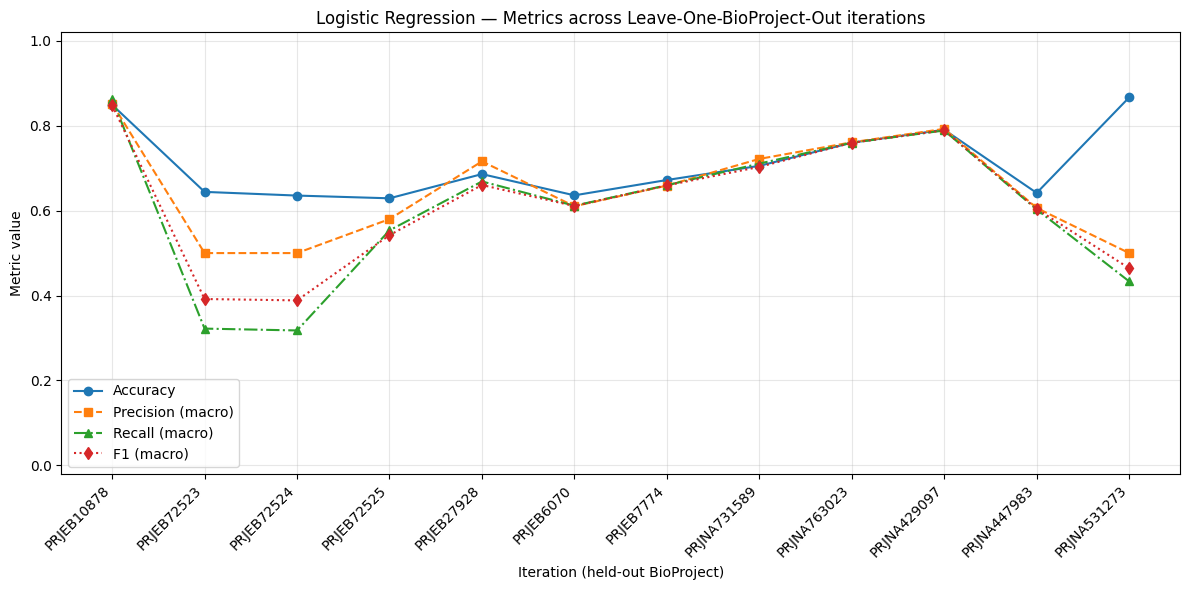

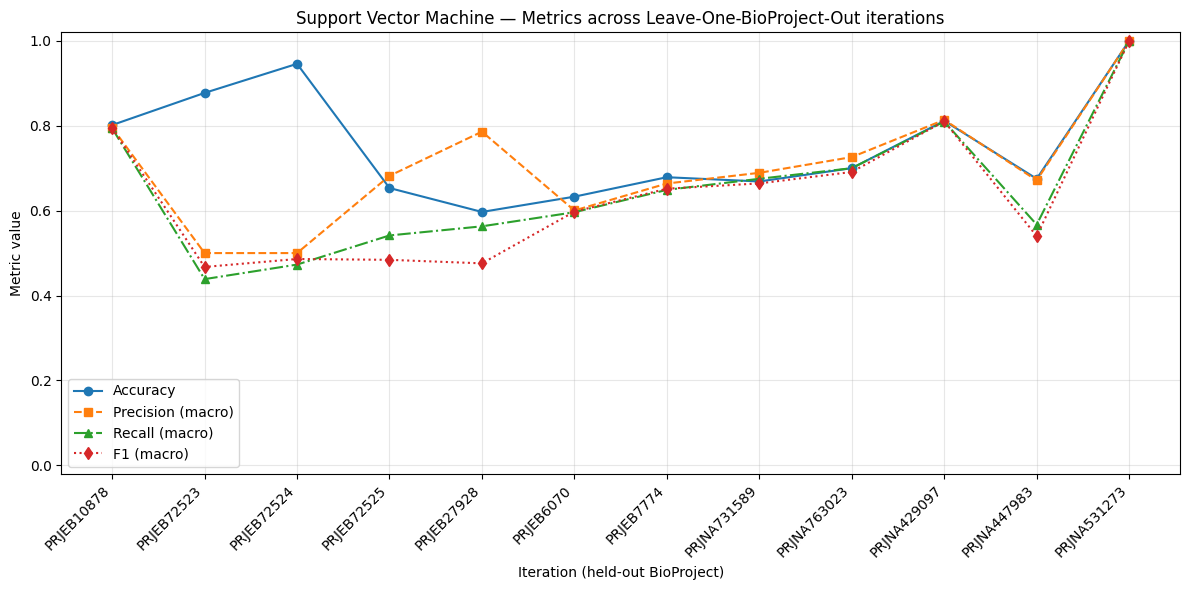


Average metrics across all iterations:
                        Accuracy  Precision_macro  Recall_macro  F1_macro
Model                                                                    
Logistic Regression       0.7097           0.6499        0.6077    0.6185
Support Vector Machine    0.7535           0.7023        0.6506    0.6386


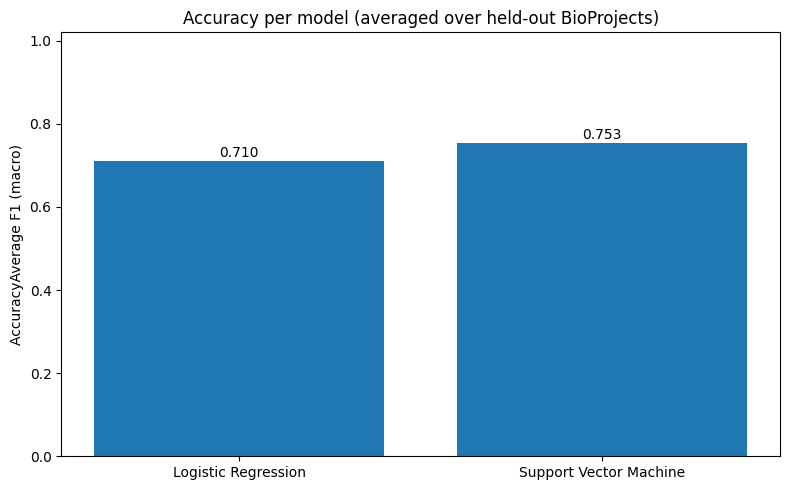

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

warnings.filterwarnings("ignore")

# ---------------------------
# Assumes ml_df exists and has:
# - feature columns
# - 'class_label' column
# - 'BioProject' column
# ---------------------------
# --- Step 1: Prepare X and y ---
X = ml_df.drop(columns=['class_label', 'BioProject'])
y = ml_df['class_label']
groups = ml_df['BioProject']

# --- Verify columns exist ---
required_cols = {'class_label', 'BioProject'}
if not required_cols.issubset(set(ml_df.columns)):
    raise ValueError(f"ml_df must contain columns: {required_cols}. Found: {ml_df.columns.tolist()}")

# Prepare features and labels
X_df = ml_df.drop(columns=['class_label', 'BioProject'])
y = ml_df['class_label'].values
groups = ml_df['BioProject'].values
feature_names = X_df.columns.tolist()
X = X_df.values

# Define models (using the parameters you provided)
models = {
    'Logistic Regression': LogisticRegressionCV(
        Cs=5,
        cv=3,
        penalty='elasticnet',
        solver='saga',
        l1_ratios=[0.5],
        scoring='roc_auc',
        max_iter=10000,
        n_jobs=-1,
        random_state=15
    ),

    'Support Vector Machine': SVC(
        kernel='rbf',
        C=1.0,
        gamma='scale',
        random_state=15,
        probability=True
    )
}

# Order of BioProjects to iterate (preserve appearance order)
unique_projects = list(pd.Series(groups).unique())
n_projects = len(unique_projects)
print(f"Found {n_projects} unique BioProjects. Iterating leave-one-project-out...")

# Storage for metrics across iterations
# structure: metrics[model_name] = {'test_projects': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'train_sizes': []}
metrics = {}
for name in models.keys():
    metrics[name] = {
        'test_projects': [],
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': [],
        'train_sizes': []
    }

# Loop over projects
for idx, test_proj in enumerate(unique_projects):
    # boolean masks
    test_mask = (groups == test_proj)
    train_mask = ~test_mask

    X_train = X[train_mask]
    y_train = y[train_mask]
    X_test = X[test_mask]
    y_test = y[test_mask]

    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print(f"[{idx+1}/{n_projects}] Test project: {test_proj} (train_size={train_size}, test_size={test_size})")

    # If a test project contains no samples or train has no samples, skip (safety)
    if test_size == 0 or train_size == 0:
        print(f"  Skipping {test_proj} because train or test size is zero.")
        continue

    for name, model in models.items():
        # Clone model to avoid warm-starting from previous fit
        # simple way: re-create new instance with same params
        # we'll use the same class and its get_params to re-instantiate
        cls = model.__class__
        params = model.get_params()
        clf = cls(**params)

        # Train and predict
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # Compute metrics (macro-average); guard against undefined metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
        rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

        # Store
        metrics[name]['test_projects'].append(test_proj)
        metrics[name]['accuracy'].append(acc)
        metrics[name]['precision'].append(prec)
        metrics[name]['recall'].append(rec)
        metrics[name]['f1'].append(f1)
        metrics[name]['train_sizes'].append(train_size)

# --- Create a long-format summary DataFrame for easier viewing ---
rows = []
for name in models.keys():
    for i, test_proj in enumerate(metrics[name]['test_projects']):
        rows.append({
            'Model': name,
            'Test_BioProject': test_proj,
            'Train_Size': metrics[name]['train_sizes'][i],
            'Accuracy': metrics[name]['accuracy'][i],
            'Precision_macro': metrics[name]['precision'][i],
            'Recall_macro': metrics[name]['recall'][i],
            'F1_macro': metrics[name]['f1'][i]
        })

summary_df = pd.DataFrame(rows)
# Order rows nicely
summary_df = summary_df[['Model', 'Test_BioProject', 'Train_Size', 'Accuracy', 'Precision_macro', 'Recall_macro', 'F1_macro']]

# Display summary table
pd.set_option('display.float_format', lambda x: f"{x:.4f}")
print("\nPer-iteration results (first 30 rows):")
print(summary_df.head(30))

# --- Plotting: One combined plot per model (Accuracy, Precision, Recall, F1 vs iteration)
metric_names = ['Accuracy', 'Precision_macro', 'Recall_macro', 'F1_macro']
ylabel_map = {
    'Accuracy': 'Accuracy',
    'Precision_macro': 'Precision (macro)',
    'Recall_macro': 'Recall (macro)',
    'F1_macro': 'F1 (macro)'
}

for name in models.keys():
    df_model = summary_df[summary_df['Model'] == name].reset_index(drop=True)
    if df_model.shape[0] == 0:
        continue

    x = np.arange(len(df_model))  # iteration index
    labels = df_model['Test_BioProject'].tolist()

    plt.figure(figsize=(12, 6))
    plt.plot(x, df_model['Accuracy'], marker='o', linestyle='-', label='Accuracy')
    plt.plot(x, df_model['Precision_macro'], marker='s', linestyle='--', label='Precision (macro)')
    plt.plot(x, df_model['Recall_macro'], marker='^', linestyle='-.', label='Recall (macro)')
    plt.plot(x, df_model['F1_macro'], marker='d', linestyle=':', label='F1 (macro)')

    plt.title(f"{name} — Metrics across Leave-One-BioProject-Out iterations")
    plt.xlabel("Iteration (held-out BioProject)")
    plt.ylabel("Metric value")
    plt.ylim(-0.02, 1.02)
    plt.xticks(ticks=x, labels=labels, rotation=45, ha='right')
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Comparison: average metrics per model (bar chart) ---
avg_rows = []
for name in models.keys():
    sub = summary_df[summary_df['Model'] == name]
    avg_rows.append({
        'Model': name,
        'Accuracy': sub['Accuracy'].mean(),
        'Precision_macro': sub['Precision_macro'].mean(),
        'Recall_macro': sub['Recall_macro'].mean(),
        'F1_macro': sub['F1_macro'].mean()
    })
avg_df = pd.DataFrame(avg_rows).set_index('Model')
print("\nAverage metrics across all iterations:")
print(avg_df)

# Bar chart of average F1 (and you can expand to others)
plt.figure(figsize=(8, 5))
plt.bar(avg_df.index, avg_df['Accuracy'])
plt.title("Accuracy per model (averaged over held-out BioProjects)")
plt.ylabel("AccuracyAverage F1 (macro)")
plt.ylim(0, 1.02)
for i, v in enumerate(avg_df['Accuracy']):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')
plt.tight_layout()
plt.show()




Found 12 unique BioProjects. Iterating leave-one-project-out...
[1/12] Test project: PRJEB10878 (train_size=3040, test_size=126)
  Best params for PRJEB10878: {'C': 10.0, 'gamma': 'scale'}
[2/12] Test project: PRJEB72523 (train_size=3003, test_size=163)
  Best params for PRJEB72523: {'C': 10.0, 'gamma': 'scale'}
[3/12] Test project: PRJEB72524 (train_size=2963, test_size=203)
  Best params for PRJEB72524: {'C': 10.0, 'gamma': 'scale'}
[4/12] Test project: PRJEB72525 (train_size=3042, test_size=124)
  Best params for PRJEB72525: {'C': 10.0, 'gamma': 'scale'}
[5/12] Test project: PRJEB27928 (train_size=2908, test_size=258)
  Best params for PRJEB27928: {'C': 1.0, 'gamma': 'scale'}
[6/12] Test project: PRJEB6070 (train_size=1883, test_size=1283)
  Best params for PRJEB6070: {'C': 10.0, 'gamma': 'scale'}
[7/12] Test project: PRJEB7774 (train_size=2861, test_size=305)
  Best params for PRJEB7774: {'C': 10.0, 'gamma': 'scale'}
[8/12] Test project: PRJNA731589 (train_size=3003, test_size=163)

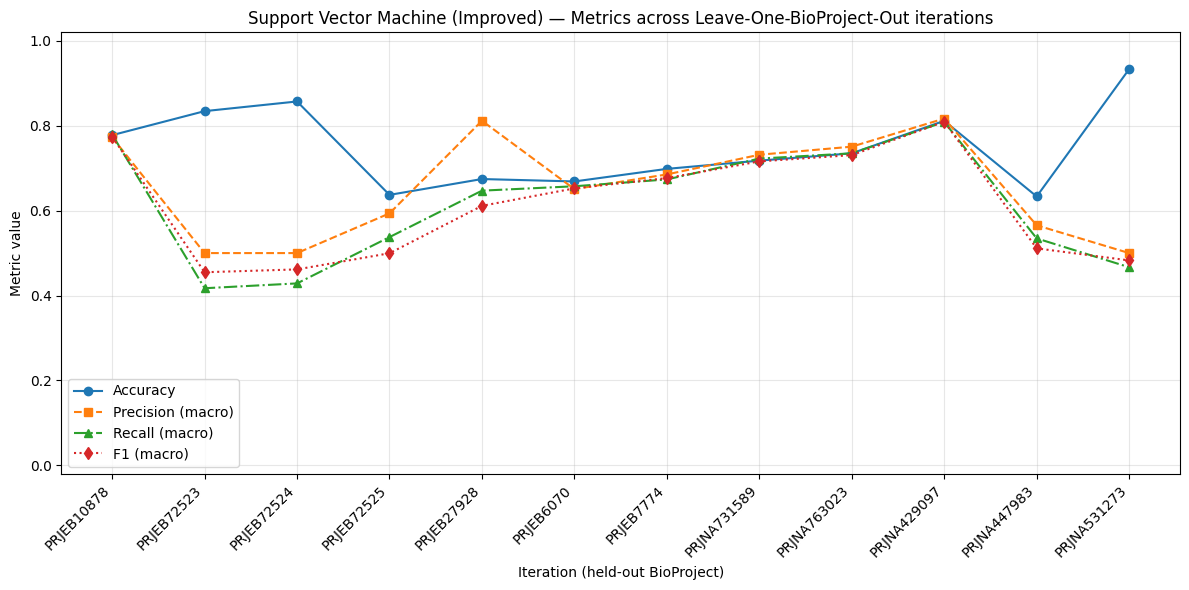


Average metrics across all iterations:
                                   Accuracy  Precision_macro  Recall_macro  \
Model                                                                        
Support Vector Machine (Improved)    0.7482           0.6565        0.6174   

                                   F1_macro  
Model                                        
Support Vector Machine (Improved)    0.6151  


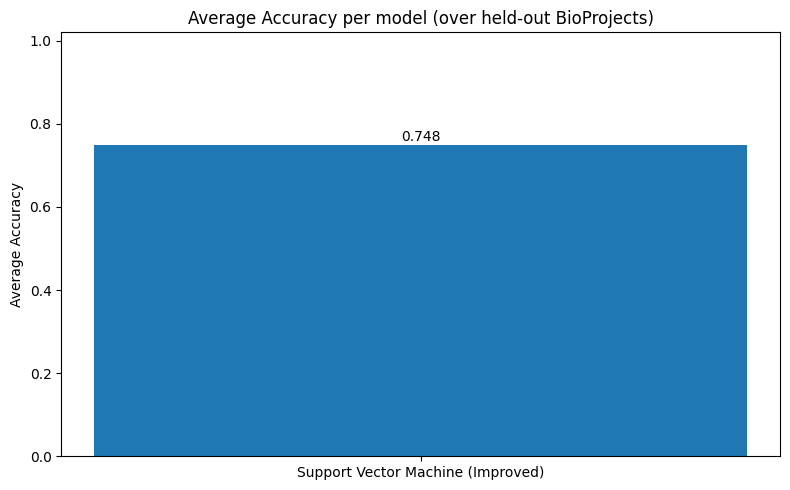

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings("ignore")

# ---------------------------
# Assumes ml_df exists and has:
# - feature columns
# - 'class_label' column
# - 'BioProject' column
# ---------------------------
# --- Step 1: Prepare X and y ---
X = ml_df.drop(columns=['class_label', 'BioProject'])
y = ml_df['class_label']
groups = ml_df['BioProject']

# --- Verify columns exist ---
required_cols = {'class_label', 'BioProject'}
if not required_cols.issubset(set(ml_df.columns)):
    raise ValueError(f"ml_df must contain columns: {required_cols}. Found: {ml_df.columns.tolist()}")

# Prepare features and labels
X_df = ml_df.drop(columns=['class_label', 'BioProject'])
y = ml_df['class_label'].values
groups = ml_df['BioProject'].values
feature_names = X_df.columns.tolist()
X = X_df.values

# Define improved SVM setup (with hyperparameter tuning and class balancing, no scaling)
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'gamma': ['scale', 0.01, 0.1]
}
base_svm = SVC(kernel='rbf', class_weight='balanced', random_state=15, probability=True)
model = GridSearchCV(base_svm, param_grid, cv=3, scoring='f1_macro', n_jobs=-1)  # Inner CV for tuning

# Single model name for consistency
models = {'Support Vector Machine (Improved)': model}

# Order of BioProjects to iterate (preserve appearance order)
unique_projects = list(pd.Series(groups).unique())
n_projects = len(unique_projects)
print(f"Found {n_projects} unique BioProjects. Iterating leave-one-project-out...")

# Storage for metrics across iterations
# structure: metrics[model_name] = {'test_projects': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'train_sizes': [], 'best_params': []}
metrics = {}
for name in models.keys():
    metrics[name] = {
        'test_projects': [],
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': [],
        'train_sizes': [],
        'best_params': []  # Track best params per fold for inspection
    }

# Loop over projects
for idx, test_proj in enumerate(unique_projects):
    # boolean masks
    test_mask = (groups == test_proj)
    train_mask = ~test_mask

    X_train = X[train_mask]
    y_train = y[train_mask]
    X_test = X[test_mask]
    y_test = y[test_mask]

    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print(f"[{idx+1}/{n_projects}] Test project: {test_proj} (train_size={train_size}, test_size={test_size})")

    # If a test project contains no samples or train has no samples, skip (safety)
    if test_size == 0 or train_size == 0:
        print(f"  Skipping {test_proj} because train or test size is zero.")
        continue

    for name, tuned_model in models.items():
        # Clone the GridSearchCV to reset for each fold (avoids leakage)
        from sklearn.base import clone
        clf = clone(tuned_model)

        # Tune and train on this fold's train set (nested CV: inner CV tunes on train)
        clf.fit(X_train, y_train)

        # Use best estimator for prediction
        best_clf = clf.best_estimator_
        y_pred = best_clf.predict(X_test)

        # Log best params for this fold
        best_params = clf.best_params_
        print(f"  Best params for {test_proj}: {best_params}")

        # Compute metrics (macro-average); guard against undefined metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
        rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

        # Store
        metrics[name]['test_projects'].append(test_proj)
        metrics[name]['accuracy'].append(acc)
        metrics[name]['precision'].append(prec)
        metrics[name]['recall'].append(rec)
        metrics[name]['f1'].append(f1)
        metrics[name]['train_sizes'].append(train_size)
        metrics[name]['best_params'].append(best_params)

# --- Create a long-format summary DataFrame for easier viewing ---
rows = []
for name in models.keys():
    for i, test_proj in enumerate(metrics[name]['test_projects']):
        rows.append({
            'Model': name,
            'Test_BioProject': test_proj,
            'Train_Size': metrics[name]['train_sizes'][i],
            'Accuracy': metrics[name]['accuracy'][i],
            'Precision_macro': metrics[name]['precision'][i],
            'Recall_macro': metrics[name]['recall'][i],
            'F1_macro': metrics[name]['f1'][i]
        })

summary_df = pd.DataFrame(rows)
# Order rows nicely
summary_df = summary_df[['Model', 'Test_BioProject', 'Train_Size', 'Accuracy', 'Precision_macro', 'Recall_macro', 'F1_macro']]

# Display summary table
pd.set_option('display.float_format', lambda x: f"{x:.4f}")
print("\nPer-iteration results (first 30 rows):")
print(summary_df.head(30))

# Optional: Display best params per fold
print("\nBest hyperparameters per fold:")
params_df = pd.DataFrame({
    'Test_BioProject': metrics[list(models.keys())[0]]['test_projects'],
    'Best_C': [p['C'] for p in metrics[list(models.keys())[0]]['best_params']],
    'Best_gamma': [p['gamma'] for p in metrics[list(models.keys())[0]]['best_params']]
})
print(params_df)

# --- Plotting: One combined plot per model (Accuracy, Precision, Recall, F1 vs iteration)
metric_names = ['Accuracy', 'Precision_macro', 'Recall_macro', 'F1_macro']
ylabel_map = {
    'Accuracy': 'Accuracy',
    'Precision_macro': 'Precision (macro)',
    'Recall_macro': 'Recall (macro)',
    'F1_macro': 'F1 (macro)'
}

for name in models.keys():
    df_model = summary_df[summary_df['Model'] == name].reset_index(drop=True)
    if df_model.shape[0] == 0:
        continue

    x = np.arange(len(df_model))  # iteration index
    labels = df_model['Test_BioProject'].tolist()

    plt.figure(figsize=(12, 6))
    plt.plot(x, df_model['Accuracy'], marker='o', linestyle='-', label='Accuracy')
    plt.plot(x, df_model['Precision_macro'], marker='s', linestyle='--', label='Precision (macro)')
    plt.plot(x, df_model['Recall_macro'], marker='^', linestyle='-.', label='Recall (macro)')
    plt.plot(x, df_model['F1_macro'], marker='d', linestyle=':', label='F1 (macro)')

    plt.title(f"{name} — Metrics across Leave-One-BioProject-Out iterations")
    plt.xlabel("Iteration (held-out BioProject)")
    plt.ylabel("Metric value")
    plt.ylim(-0.02, 1.02)
    plt.xticks(ticks=x, labels=labels, rotation=45, ha='right')
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Comparison: average metrics per model (bar chart) ---
avg_rows = []
for name in models.keys():
    sub = summary_df[summary_df['Model'] == name]
    avg_rows.append({
        'Model': name,
        'Accuracy': sub['Accuracy'].mean(),
        'Precision_macro': sub['Precision_macro'].mean(),
        'Recall_macro': sub['Recall_macro'].mean(),
        'F1_macro': sub['F1_macro'].mean()
    })
avg_df = pd.DataFrame(avg_rows).set_index('Model')
print("\nAverage metrics across all iterations:")
print(avg_df)

# Bar chart of average Accuracy (fixed typo in original)
plt.figure(figsize=(8, 5))
plt.bar(avg_df.index, avg_df['Accuracy'])
plt.title("Average Accuracy per model (over held-out BioProjects)")
plt.ylabel("Average Accuracy")
plt.ylim(0, 1.02)
for i, v in enumerate(avg_df['Accuracy']):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')
plt.tight_layout()
plt.show()